# Angle estimation with the Bayes' filter
This live script illustrates how the Bayes' filter works by considering an example where an angle is to be estimated.

Suppose that we wish to estimate the angle of a spinning wheel with a camera. Different colors with continuously varying values of hue according to the HSV color representation are placed on the wheel. Due to space limitations, the camera is placed close to the wheel and can only detect a limited range of the wheel. The angle is quantized into $N$ values and this induces a quantization also for the value of hue of the camera measurements. Due to changes in brightness and other exterior conditions, the camera processing algorithm can provide wrong estimates of the hue, but these are typically close to the correct value. The setting is depicted in Figure 1. 



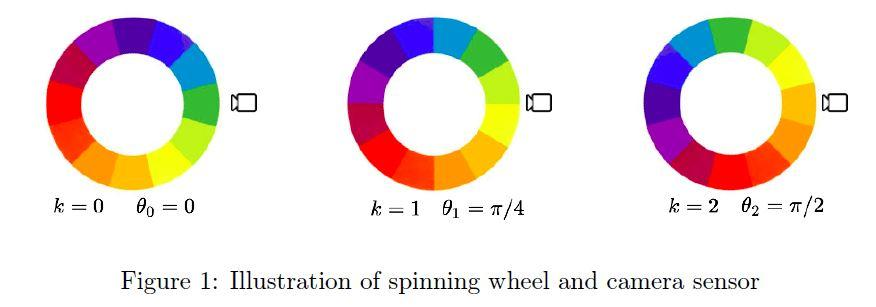

The wheel is assumed to be spinning anti clock-wise according to the following model for the angle $\theta_k$ at time $k\in \mathbb{N}\cup \lbrace 0\rbrace$,


$$\theta_{k+1} =\theta_k +w_k$$


where $\textrm{Prob}[\theta_0 =\frac{2\pi }{N}i]=p_{0,i}$ for $i\in \lbrace 0,1,\dots ,N-1\rbrace$ and $\textrm{Prob}[w_k =\frac{2\pi }{N}j]=p_{w,j}$ for every $k$ and $j\in \lbrace 0,1,\dots ,N-1\rbrace$.

The measurement at time $k$ obtained from the algorithm processing camera data is denoted by $y_k \in \lbrace 1,\dots ,N\rbrace$,  and follows the model

$$\textrm{Prob}[y_k =i|\theta_k =\frac{2\pi }{N}j]=D_{ij}.$$

The goal is to compute, for $k\in \lbrace 0,1,\dots ,h\rbrace$, and for $r\in \lbrace 0,\dots ,N-1\rbrace$,

$$\textrm{Prob}[\theta_k =r|I_k ],$$

where $I_k =\lbrace y_0 ,\dots ,y_k \rbrace$. This is accomplished by the following script which prints a matrix p with $h$ n-dimensional collumns corresponding to $\textrm{Prob}[\theta_k =r|I_k ]$ for each $k\in \lbrace 0,1,\dots ,h-1\rbrace$.


In [ ]:
import numpy as np

In [ ]:
# define parameters
pw = np.array([0.2, 0, 0.2, 0.6])
py = np.array([0.8, 0.1, 0, 0.1])
p0 = np.array([1/4, 1/4, 1/4, 1/4])
N = len(pw)
y = np.array([1, 2, 1, 2, 3, 4])
h = len(y)

# matrices and initializations needed for the Bayes' filter
P = np.zeros((N, N))
D = np.zeros((N, N))
for i in range(len(pw)):
    P[i, :] = np.roll(pw, i)
    D[i, :] = np.roll(py, i)

p = np.zeros((N, h))
p_ = np.zeros((N, h))
q = np.zeros((N, h))

# Bayes' filter
p0bar = np.diag(D[y[0] - 1, :]) @ p0
p[:, 0] = p0bar / np.sum(p0bar)

for k in range(1, h):
    q[:, k] = P @ p[:, k - 1]                    # by convention and initial prediction step
    p_[:, k] = np.diag(D[y[k] - 1, :]) @ q[:, k] # prediction step
    p[:, k] = p_[:, k] / np.sum(p_[:, k])        # correction step

In [ ]:
p